In [19]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [20]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/2/"
isu = pd.read_csv(fname+"BLE_isu.csv",encoding = 'utf-8')
tent = pd.read_csv(fname+"BLE_tent.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

3回目
その他
テント
3回目


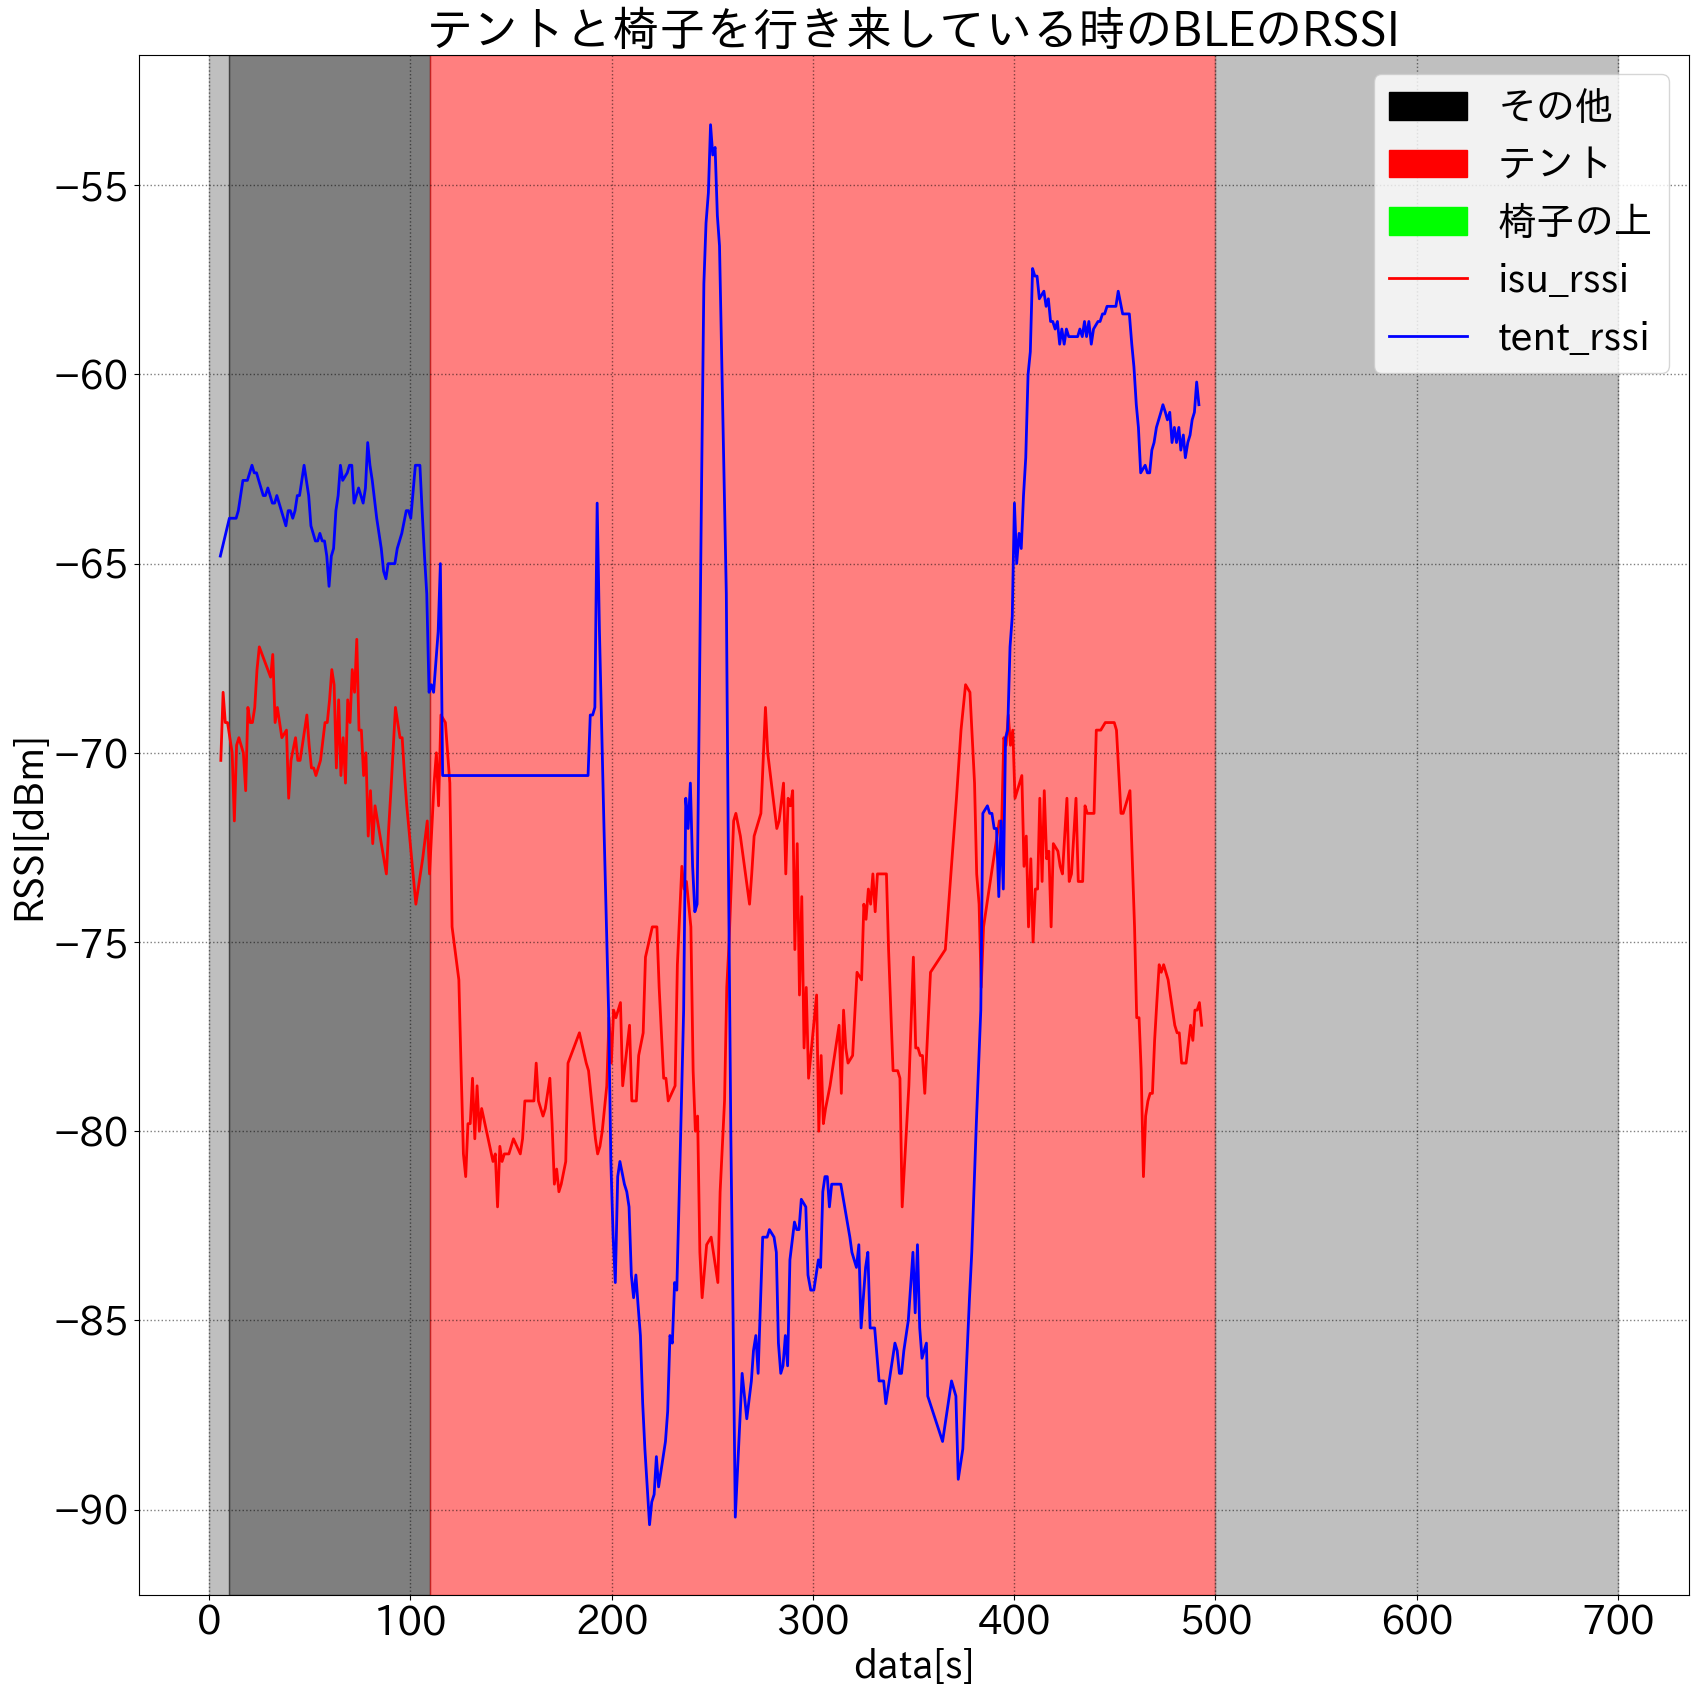

In [21]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("テントと椅子を行き来している時のBLEのRSSI")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('RSSI[dBm]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
# グラフの描画
ax3.plot(
    (isu["time"] - isu["time"][0]) / 1000,
    isu["rssi"].rolling(window=5).mean(),
    label="rssi",
    linewidth=2,  # 線の太さを指定
    color="red"  # 線の色を赤色に指定
)

ax3.plot(
    (tent["time"] - tent["time"][0]) / 1000,
    tent["rssi"].rolling(window=5).mean(),
    label="rssi",
    linewidth=2,  # 線の太さを指定
    color="blue"  # 線の色を赤色に指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
# 各contentに対応する色の辞書を作成
content_colors = {
    "その他": "#000000",
    "テント": "#ff0000",
    "椅子の上": "#00ff00",
}

# 階段利用区間をラベリング
# BLEの時だけごりおしついか
padding = 200000  # 200秒

for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000 if i < len(ans) - 1 else (ans["time"].max() + padding - ans["time"][0]) / 1000
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 線の情報を追加
line1 = matplotlib.lines.Line2D([0], [0], color="red", linewidth=2)
line2 = matplotlib.lines.Line2D([0], [0], color="blue", linewidth=2)
content_patches.append(line1)
content_patches.append(line2)
content_labels.append("isu_rssi")
content_labels.append("tent_rssi")

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()